# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#import relevant libraries
import pandas as pd
import os
import requests
import wptools
import json
import numpy as np
import tweepy
import matplotlib
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10)

<Figure size 1200x800 with 0 Axes>

In [2]:
#read twitter archive file into a dataframe
df_archive = pd.read_csv('/Users/kaittkeesarmalkar/Downloads/twitter-archive-enhanced.csv')
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
df_image = pd.read_csv('image-predictions.tsv',sep= '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# json file that was provided in the course was used here
df_tweet = pd.read_json('/Users/kaittkeesarmalkar/Downloads/tweet-json.txt', lines = True,encoding='utf-8')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Visual Assessment

In [5]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
df_tweet

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Programmatic Assessment
Using code to assess all three dataframes
1) Inspecting datatypes
2) Looking at data sample 
3) Looking at data values
4) Checking the dataframe for duplicates, missing values etc.

In [8]:
#Inspecting datatypes
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# Inspecting a sample of the dataframe
df_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2281,667369227918143488,NaN,NaN,2015-11-19 15:49:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a neat pup. Very white. Cool shad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667369227...,10,10,None,None,None,None,None
2033,671744970634719232,NaN,NaN,2015-12-01 17:37:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very fit horned dog here. Looks powerful. Not ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671744970...,6,10,None,None,None,None,None
2170,669351434509529089,NaN,NaN,2015-11-25 03:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sully. He's a Leviticus Galapagos. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669351434...,10,10,Sully,None,None,None,None
2301,667044094246576128,NaN,NaN,2015-11-18 18:17:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 gimme now https://t.co/QZAnwgnOMB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667044094...,12,10,None,None,None,None,None
667,790337589677002753,NaN,NaN,2016-10-23 23:42:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She can hear your cells divide. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790337589...,12,10,Maggie,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
1209,715696743237730304,NaN,NaN,2016-04-01 00:26:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's a Lithuanian High-Steppin Stic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715696743...,10,10,Toby,None,None,None,None
1821,676582956622721024,NaN,NaN,2015-12-15 02:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Vinnie. He's having fun while being safe....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676582956...,8,10,Vinnie,None,None,None,None
2300,667062181243039745,NaN,NaN,2015-11-18 19:29:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keet. He is a Floridian Amukamara. Abs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667062181...,10,10,Keet,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None


In [10]:
## Description
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
## Testing to ensure that the tweet_ids are unique
df_archive['tweet_id'].duplicated().sum()

0

In [12]:
## Since per the description the minimum value of ratings = 0 which is an outlierwe would want to know how many records have that value
df_archive[df_archive['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [13]:
## Since per the description the minimum value of ratings = 0 which is an outlierwe would want to know how many records have that value
df_archive[df_archive['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [14]:
# Checking the dataframe to see if all the names were valid dog names
df_archive['name'].value_counts().head(40)

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Penny       10
Lola        10
Tucker      10
Bo           9
Winston      9
the          8
Sadie        8
Toby         7
an           7
Bailey       7
Daisy        7
Buddy        7
Rusty        6
Leo          6
Dave         6
Stanley      6
Koda         6
Scout        6
Jax          6
Bella        6
Oscar        6
Milo         6
Jack         6
Sammy        5
George       5
very         5
Sunny        5
Gus          5
Larry        5
Finn         5
Phil         5
Oakley       5
Louis        5
Alfie        5
Name: name, dtype: int64

In [15]:
## Assessing the image dataframe
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
## Taking the sample of the image dataframe
df_image.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
781,689999384604450816,https://pbs.twimg.com/media/CZNexghWAAAYnT-.jpg,1,standard_poodle,0.444499,True,English_springer,0.129830,True,pug,0.073806,True
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
1659,811386762094317568,https://pbs.twimg.com/media/C0Kf9PtWQAEW4sE.jpg,1,Pembroke,0.804177,True,Cardigan,0.189890,True,beagle,0.001965,True
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
1232,746056683365994496,https://pbs.twimg.com/media/ClqGl7fXIAA8nDe.jpg,1,Shetland_sheepdog,0.433320,True,collie,0.335997,True,borzoi,0.177179,True
896,699691744225525762,https://pbs.twimg.com/media/CbXN7aPWIAE0Xt1.jpg,1,hippopotamus,0.982269,False,sea_lion,0.006295,False,dugong,0.005768,False
1628,804738756058218496,https://pbs.twimg.com/media/CysBn-lWIAAoRx1.jpg,1,Tibetan_mastiff,0.915790,True,German_shepherd,0.062480,True,Leonberg,0.008297,True
1145,730427201120833536,https://pbs.twimg.com/media/CiL_qh0W0AAu5VA.jpg,1,Eskimo_dog,0.682082,True,Siberian_husky,0.289288,True,Staffordshire_bullterrier,0.008771,True
531,676821958043033607,https://pbs.twimg.com/media/CWSN-vaXAAA8Ehr.jpg,2,Great_Pyrenees,0.869804,True,kuvasz,0.079814,True,standard_poodle,0.013263,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [17]:
# Dataframe description
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
## Since per description the max value fof p1 confidence interval is 1 which is very high we want to find out how many records have p1_conf =1 and if all the records are valid
df_image[df_image['p1_conf']== 1.000000]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [19]:
## Checking to ensure that the tweet_id field is unique and has no duplicate values
df_image[df_image['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [20]:
# Assessing the tweets dataframe, checking the datatypes
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [21]:
## Checking data sample from the tweets dataframe
df_tweet.sample(20)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
648,2016-10-31 02:17:31+00:00,792913359805018113,792913359805018112,Here is a perfect example of someone who has t...,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 792913326326026240, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,16063,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2343,2015-11-16 01:22:45+00:00,666063827256086533,666063827256086528,This is the happiest dog you will ever see. Ve...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666063820255862784, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,496,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
866,2016-08-06 02:27:27+00:00,761750502866649088,761750502866649088,"RT @dog_rates: ""Tristan do not speak to me wit...",False,"[0, 126]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 685325091882799104, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Fri Jan 08 05:00:14 +0000 2016...,NaN,NaN,NaN
955,2016-07-08 22:09:27+00:00,751538714308972544,751538714308972544,This is Max. She has one ear that's always sli...,False,"[0, 93]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 751538705064755201, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5547,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
104,2017-06-06 16:07:15+00:00,872122724285648897,872122724285648896,This is Kody. He's a baller. Wishes he was a l...,False,"[0, 126]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 872122708573777925, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,35324,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1577,2016-01-13 16:36:55+00:00,687312378585812992,687312378585812992,"""You got any games on your phone"" 7/10 for inv...",False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 687312369295486976, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4777,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
734,2016-09-28 16:07:23+00:00,781163403222056960,781163403222056960,"We normally don't rate lobsters, but this one ...",False,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 781163395106082816, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,10895,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
155,2017-05-08 00:54:59+00:00,861383897657036800,861383897657036800,This is Hobbes. He's never seen bubbles before...,False,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 861383888685236224, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,37744,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
783,2016-09-11 22:20:06+00:00,775096608509886464,775096608509886464,"RT @dog_rates: After so many requests, this is...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Wed Jun 08 02:41:38 +0000 2016...,NaN,NaN,NaN
935,2016-07-13 18:42:44+00:00,753298634498793472,753298634498793472,RT @dog_rates: This is Carly. She's actually 2...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Mon Dec 28 17:12:42 +0000 2015...,NaN,NaN,NaN


In [22]:
## Looking at the basic stats of the tweets dataframe
df_tweet.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [23]:
## Checking the dataframe to ensure that the tweet id is unique
df_tweet[df_tweet['id'].duplicated()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status


## Quality issues

### Twitter Archive Table
1. There are 181 rows where retweet_status_id is not null and those would have to be removed.
2. None instead of nulls in fields like name, doggo, floofer,pupper,puppo
3. The min value for rating denominator is 0 which cannot be true hence we would delete the records where denominator is 0.
4. The min value for rating numerator is 0 which would also not make sense so we would delete the records with numerator = 0.
5. None in Dog names field needs to be updated to null.



### Images Table

6. Dog names in the images dataframe need to be normalized to all camelcase.
7. Column names like p1,p3 and p3 need to be updated to names that would offer more explanation
8. The "_" in dog names need to be replaced with blanks.
9. In images dataframe max p1 = 1 where p1_dog = False but if you check the url the image is actually a dog hence update this to True. I found a few more records where p_conf value was > 0.9 and p1_dog was False but image was a dog. I reviewed the table and decided to delete the rows where p1_conf > 0.9 but p1_dog is False.

### Tweets Table

10. id should be updated to tweet_id for uniformity.





### Tidiness issues

1. Doggo, floofer, puppo and pupper can be one dog_type column.
2. Extra columns in all dataframes can be dropped.
3. Timestamp and Created_at are duplicate columns.
4. Tweet and archive dataframe can be merged into one.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [249]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()


### Issue #1:

#### Define:

Removing rows where retweeted_status_id is not null since we want only orignial tweets.

#### Code

In [250]:

df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

#### Test

In [251]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #2:

#### Define

Converting None to null in fields like name,doggo,floofer,pupper,puppo

#### Code

In [252]:
cols = ['doggo','floofer','pupper','puppo']
df_archive_clean[cols] = df_archive_clean[cols].replace('None',np.nan)
df_archive_clean.doggo.unique()

array([nan, 'doggo'], dtype=object)

#### Test

In [253]:
df_archive_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,NaN,NaN,NaN,NaN
1177,719704490224398336,NaN,NaN,2016-04-12 01:51:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clyde. He's making sure you're having ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719704490...,12,10,Clyde,NaN,NaN,pupper,NaN
1038,744334592493166593,NaN,NaN,2016-06-19 01:02:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blanket. She has overthrown her human....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744334592...,11,10,Blanket,NaN,NaN,NaN,NaN
330,833124694597443584,NaN,NaN,2017-02-19 01:23:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gidget. She's a spy pupper. Stealthy a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833124694...,12,10,Gidget,NaN,NaN,pupper,NaN
1666,682697186228989953,NaN,NaN,2015-12-31 22:57:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682697186...,12,10,None,NaN,NaN,NaN,NaN
1436,697255105972801536,NaN,NaN,2016-02-10 03:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. He likes to kiss all the big mil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697255105...,10,10,Charlie,NaN,NaN,NaN,NaN
1873,675145476954566656,NaN,NaN,2015-12-11 02:49:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What an honor. 3 dogs here. Blond one is clear...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675145476...,9,10,None,NaN,NaN,NaN,NaN
66,879415818425184262,NaN,NaN,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,NaN,NaN,NaN,NaN
1170,720775346191278080,NaN,NaN,2016-04-15 00:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Berkeley. He's in a predicament. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720775346...,10,10,Berkeley,NaN,NaN,NaN,NaN
1289,708149363256774660,NaN,NaN,2016-03-11 04:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jebberson. He's the reigning hide and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708149363...,10,10,Jebberson,NaN,NaN,NaN,NaN


In [254]:
sum(df_archive_clean['doggo'].isnull())

2088

In [255]:
sum(df_archive_clean['puppo'].isnull())

2150

### Issue # 3

#### Define

Deleting rows with numerator = 0

#### Code

In [256]:
df_archive_clean = df_archive_clean.loc[df_archive_clean['rating_numerator'] > 0]

#### Test

In [257]:
df_archive_clean[df_archive_clean['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue # 4

#### Define

Deleting rows with denominator = 0

#### Code

In [258]:
df_archive_clean = df_archive_clean.loc[df_archive_clean['rating_denominator'] > 0]

#### Test

In [259]:
df_archive_clean[df_archive_clean['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue # 5

#### Define

Replace none in the name field with nulls

#### Code

In [260]:
df_archive_clean['name'] = df_archive_clean['name'].replace('None',np.nan)

#### Test

In [261]:
df_archive_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1736,679722016581222400,NaN,NaN,2015-12-23 17:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mike. He is a Jordanian Frito Pilates....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679722016...,8,10,Mike,NaN,NaN,NaN,NaN
1080,738891149612572673,7.384119e+17,358972768.0,2016-06-04 00:32:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@mount_alex3 13/10,NaN,NaN,NaN,NaN,13,10,NaN,NaN,NaN,NaN,NaN
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,NaN,NaN,NaN,NaN,NaN
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,NaN,NaN,NaN,NaN,NaN
766,777684233540206592,NaN,NaN,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/777684233...,12,10,NaN,NaN,NaN,NaN,NaN
394,825829644528148480,NaN,NaN,2017-01-29 22:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825829644...,12,10,Toby,NaN,NaN,NaN,NaN
886,759943073749200896,NaN,NaN,2016-08-01 02:45:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a wicked fast pupper. 12/10 camera coul...,NaN,NaN,NaN,https://vine.co/v/5AJm5pq7Kav,12,10,NaN,NaN,NaN,pupper,NaN
559,803276597545603072,NaN,NaN,2016-11-28 16:37:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His selfie game is legendary....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803276597...,11,10,Winston,NaN,NaN,NaN,NaN
551,804475857670639616,NaN,NaN,2016-12-02 00:02:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13...,NaN,NaN,NaN,https://twitter.com/bvuepd/status/804417859124...,13,10,NaN,NaN,NaN,NaN,NaN
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,NaN,NaN,NaN,NaN,NaN


In [262]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2172 non-null   int64  
 1   in_reply_to_status_id       76 non-null     float64
 2   in_reply_to_user_id         76 non-null     float64
 3   timestamp                   2172 non-null   object 
 4   source                      2172 non-null   object 
 5   text                        2172 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2115 non-null   object 
 10  rating_numerator            2172 non-null   int64  
 11  rating_denominator          2172 non-null   int64  
 12  name                        1495 non-null   object 
 13  doggo                       87 no

### Issue #6

#### Define

Convert p1,p2 and p3 to lower case string

#### Code

In [263]:
df_image_clean['p1'] = df_image_clean['p1'].str.title()
df_image_clean['p2'] = df_image_clean['p2'].str.title()
df_image_clean['p3'] = df_image_clean['p3'].str.title()


#### Test

In [264]:
df_image_clean.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1901,851591660324737024,https://pbs.twimg.com/media/C9F2FG5WAAAJ0iN.jpg,1,Cardigan,0.394507,True,Chihuahua,0.077254,True,French_Bulldog,0.076559,True
1976,870308999962521604,https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg,2,Greater_Swiss_Mountain_Dog,0.622752,True,Appenzeller,0.158463,True,Entlebucher,0.148115,True
1257,748575535303884801,https://pbs.twimg.com/media/CmN5ecNWMAE6pnf.jpg,1,Muzzle,0.176172,False,Seat_Belt,0.160953,False,Soft-Coated_Wheaten_Terrier,0.086499,True
1684,814153002265309185,https://pbs.twimg.com/media/C0xz04SVIAAeyDb.jpg,1,Golden_Retriever,0.490068,True,Labrador_Retriever,0.291956,True,Chow,0.072475,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_Setter,0.503672,True,Yorkshire_Terrier,0.174201,True,Pekinese,0.109454,True
393,673583129559498752,https://pbs.twimg.com/media/CVkMRUeWsAA9bMh.jpg,1,Arctic_Fox,0.153271,False,Golden_Retriever,0.113946,True,Borzoi,0.110718,True
1765,826598365270007810,https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg,1,French_Bulldog,0.628119,True,Siamese_Cat,0.117397,False,Cougar,0.082765,False
164,668975677807423489,https://pbs.twimg.com/media/CUit1O1WoAEBHjj.jpg,1,Basset,0.605437,True,Welsh_Springer_Spaniel,0.184783,True,Saint_Bernard,0.116299,True
1819,834209720923721728,https://pbs.twimg.com/media/C5O1UAaWIAAMBMd.jpg,1,Golden_Retriever,0.754799,True,Pekinese,0.197861,True,Labrador_Retriever,0.008654,True
676,683462770029932544,https://pbs.twimg.com/media/CXwlw9MWsAAc-JB.jpg,1,Italian_Greyhound,0.399560,True,Whippet,0.267153,True,German_Short-Haired_Pointer,0.081319,True


### Issue #7

#### Define

Rename p1 to p1_breed,p2 to p2_breed and p3 to p3_breed

#### Code

In [265]:
df_image_clean.rename(columns={'p1': 'p1_breed', 'p2': 'p2_breed','p3':'p3_breed'}, inplace=True)

### Issue #8

#### Define

Drop the rows where only p1_dog is false and p1_conf is > 0.90

#### Code

In [266]:
df_image_clean['p1_conf'] = df_image_clean['p1_conf'].astype(str)
df_drop = df_image_clean[ (df_image_clean['p1_conf'] >= '0.900')&(df_image_clean['p1_dog'] == False)]
# df_image_clean = df_image_clean.merge(df_drop, how='left', indicator=True)

In [267]:
df_image_clean = df_image_clean.merge(df_drop, how='left', indicator=True)
df_image_clean = df_image_clean[df_image_clean['_merge'] == 'left_only']

In [268]:
df_image_clean.drop('_merge',axis = 1, inplace = True)

####  Test

In [269]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1975 non-null   int64  
 1   jpg_url   1975 non-null   object 
 2   img_num   1975 non-null   int64  
 3   p1_breed  1975 non-null   object 
 4   p1_conf   1975 non-null   object 
 5   p1_dog    1975 non-null   bool   
 6   p2_breed  1975 non-null   object 
 7   p2_conf   1975 non-null   float64
 8   p2_dog    1975 non-null   bool   
 9   p3_breed  1975 non-null   object 
 10  p3_conf   1975 non-null   float64
 11  p3_dog    1975 non-null   bool   
dtypes: bool(3), float64(2), int64(2), object(5)
memory usage: 160.1+ KB


In [270]:
df_image_clean[ (df_image_clean['p1_conf'] >= '0.900')&(df_image_clean['p1_dog'] == False)]

,tweet_id,jpg_url,img_num,p1_breed,p1_conf,p1_dog,p2_breed,p2_conf,p2_dog,p3_breed,p3_conf,p3_dog


### Issue #9

#### Define

Remove '_' from dog breeds and replace it with blanks using replace function

#### Code

In [271]:
df_image_clean['p1_breed'] = df_image_clean['p1_breed'].str.replace('_',' ')
df_image_clean['p2_breed'] = df_image_clean['p2_breed'].str.replace('_',' ')
df_image_clean['p3_breed'] = df_image_clean['p3_breed'].str.replace('_',' ')

#### Test

In [272]:
df_image_clean.sample(20)

,tweet_id,jpg_url,img_num,p1_breed,p1_conf,p1_dog,p2_breed,p2_conf,p2_dog,p3_breed,p3_conf,p3_dog
217,670069087419133954,https://pbs.twimg.com/media/CUyQRzHWoAAhF1D.jpg,1,Boathouse,0.3138289999999999,False,Birdhouse,0.138331,False,Ashcan,0.045673,False
489,675522403582218240,https://pbs.twimg.com/media/CV_wCh8W4AEWWZ9.jpg,1,Cocker Spaniel,0.299708,True,Golden Retriever,0.263665,True,Irish Setter,0.080323,True
251,670704688707301377,https://pbs.twimg.com/media/CU7SW39WwAAL8Rw.jpg,1,Norwich Terrier,0.419838,True,Cairn,0.351876,True,Norfolk Terrier,0.051094,True
867,697575480820686848,https://pbs.twimg.com/media/Ca5JMvMUsAAGMll.jpg,1,Siamese Cat,0.256698,False,Whippet,0.119805,True,Bull Mastiff,0.102595,True
1635,806219024703037440,https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg,1,Chow,0.835102,True,Pomeranian,0.040783,True,Eskimo Dog,0.021274,True
520,676533798876651520,https://pbs.twimg.com/media/CWOH4s9U8AEtkmQ.jpg,1,Chow,0.2652739999999999,True,Ice Bear,0.167614,False,Fur Coat,0.117506,False
1012,709519240576036864,https://pbs.twimg.com/media/Cdi3-f7W8AUOm9T.jpg,1,Cocker Spaniel,0.4149819999999999,True,Newfoundland,0.225482,True,Flat-Coated Retriever,0.196789,True
265,670803562457407488,https://pbs.twimg.com/media/CU8sSAvXIAAB1Py.jpg,1,Basenji,0.344101,True,Ibizan Hound,0.210282,True,Toy Terrier,0.196279,True
169,668989615043424256,https://pbs.twimg.com/media/CUi6geuUYAIvE9n.jpg,1,Pug,0.917326,True,Waffle Iron,0.014918,False,Chihuahua,0.013524,True
1094,719991154352222208,https://pbs.twimg.com/media/Cf3sH62VAAA-LiP.jpg,2,Golden Retriever,0.605304,True,Cocker Spaniel,0.130948,True,Labrador Retriever,0.094692,True


### Issue # 10

#### Define

Renaming id field to tweet id

#### Code

In [273]:
df_tweet_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [274]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

## Tidiness Issues

### Issue #1

#### Define

Merge doggo, floofer, pupper, puppo to form one dog_type column

#### Code

In [275]:
df_archive_clean['dog_stage'] = df_archive_clean[df_archive_clean.columns[13:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1)
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].replace('',np.nan)
df_archive_clean.drop(['doggo','floofer','pupper','puppo'],1,inplace = True)

#### Test

In [276]:
df_archive_clean['dog_stage'].value_counts()

pupper           224
doggo             75
puppo             24
doggo pupper      10
floofer            9
doggo floofer      1
doggo puppo        1
Name: dog_stage, dtype: int64

In [277]:
df_archive_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2221,668480044826800133,NaN,NaN,2015-11-22 17:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to DayZ. She is definitely stuck on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668480044...,11,10,DayZ,NaN
1597,686050296934563840,NaN,NaN,2016-01-10 05:01:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio. He's a Macedonian Poppycock. 9...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686050296...,11,10,Flávio,NaN
1223,714251586676113411,NaN,NaN,2016-03-28 00:43:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He hates potted plants. 8/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714251586...,8,10,Thumas,NaN
954,751793661361422336,NaN,NaN,2016-07-09 15:02:31 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Fred. He's having one heck of a summer...,NaN,NaN,NaN,https://vine.co/v/5W5YHdTJvaV,11,10,Fred,NaN
930,754449512966619136,NaN,NaN,2016-07-16 22:55:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dex. He can see into your past and fut...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754449512...,11,10,Dex,NaN
674,789599242079838210,NaN,NaN,2016-10-21 22:48:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brownie. She's wearing a Halloween the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789599242...,12,10,Brownie,NaN
1141,727644517743104000,NaN,NaN,2016-05-03 23:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727644517...,13,10,NaN,doggo
1379,701545186879471618,NaN,NaN,2016-02-21 23:13:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Millie. She's practicing her dive form fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701545186...,10,10,Millie,pupper
1841,675878199931371520,NaN,NaN,2015-12-13 03:21:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Ok, I'll admit this is a pretty adorable bunny...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675878199...,11,10,NaN,NaN
1726,680055455951884288,NaN,NaN,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,NaN


### Issue #2

#### Define

Timestamp and Created_at are duplicated and timestamp can be dropped

#### Code

In [278]:
df_archive_clean = df_archive_clean.drop(['timestamp'],axis = 1)

#### Test

In [279]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2172 non-null   int64  
 1   in_reply_to_status_id       76 non-null     float64
 2   in_reply_to_user_id         76 non-null     float64
 3   source                      2172 non-null   object 
 4   text                        2172 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               2115 non-null   object 
 9   rating_numerator            2172 non-null   int64  
 10  rating_denominator          2172 non-null   int64  
 11  name                        1495 non-null   object 
 12  dog_stage                   344 non-null    object 
dtypes: float64(4), int64(3), object(6

#### Test

In [280]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1975 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1975 non-null   int64  
 1   jpg_url   1975 non-null   object 
 2   img_num   1975 non-null   int64  
 3   p1_breed  1975 non-null   object 
 4   p1_conf   1975 non-null   object 
 5   p1_dog    1975 non-null   bool   
 6   p2_breed  1975 non-null   object 
 7   p2_conf   1975 non-null   float64
 8   p2_dog    1975 non-null   bool   
 9   p3_breed  1975 non-null   object 
 10  p3_conf   1975 non-null   float64
 11  p3_dog    1975 non-null   bool   
dtypes: bool(3), float64(2), int64(2), object(5)
memory usage: 160.1+ KB


In [281]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2172 non-null   int64  
 1   in_reply_to_status_id       76 non-null     float64
 2   in_reply_to_user_id         76 non-null     float64
 3   source                      2172 non-null   object 
 4   text                        2172 non-null   object 
 5   retweeted_status_id         0 non-null      float64
 6   retweeted_status_user_id    0 non-null      float64
 7   retweeted_status_timestamp  0 non-null      object 
 8   expanded_urls               2115 non-null   object 
 9   rating_numerator            2172 non-null   int64  
 10  rating_denominator          2172 non-null   int64  
 11  name                        1495 non-null   object 
 12  dog_stage                   344 non-null    object 
dtypes: float64(4), int64(3), object(6

In [282]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Issue #3

#### Define

Merging archive and tweets dataframe

#### Code

In [283]:
df_tw_ar_merge =  pd.merge(df_archive_clean,df_tweet_clean,how = 'outer',on = ['tweet_id'])

#### Test

In [284]:
df_tw_ar_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2354 non-null   int64              
 1   in_reply_to_status_id_x        76 non-null     float64            
 2   in_reply_to_user_id_x          76 non-null     float64            
 3   source_x                       2172 non-null   object             
 4   text                           2172 non-null   object             
 5   retweeted_status_id            0 non-null      float64            
 6   retweeted_status_user_id       0 non-null      float64            
 7   retweeted_status_timestamp     0 non-null      object             
 8   expanded_urls                  2115 non-null   object             
 9   rating_numerator               2172 non-null   float64            
 10  rating_denominator      

### Dropping extra columns from the dataframe

In [285]:
df_tw_ar_merge.drop(['retweeted_status_id', 'retweeted_status_user_id', 
                'retweeted_status_timestamp', 'geo','coordinates','place','contributors','quoted_status_id',
                     'quoted_status_id_str','quoted_status','in_reply_to_status_id_x','in_reply_to_user_id_x','in_reply_to_status_id_y'
                    ,'source_y','in_reply_to_status_id_y','source_x','in_reply_to_status_id_str','in_reply_to_user_id_y','in_reply_to_user_id_str'], axis=1, inplace=True)


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [286]:
df_master =  pd.merge(df_tw_ar_merge,df_image_clean,how = 'outer',on = ['tweet_id'])

In [287]:
df_master.to_csv('/Users/kaittkeesarmalkar/Downloads/twitter_archive_master.csv',index = False)

In [288]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2356 non-null   int64              
 1   text                           2172 non-null   object             
 2   expanded_urls                  2115 non-null   object             
 3   rating_numerator               2172 non-null   float64            
 4   rating_denominator             2172 non-null   float64            
 5   name                           1495 non-null   object             
 6   dog_stage                      344 non-null    object             
 7   created_at                     2354 non-null   datetime64[ns, UTC]
 8   id_str                         2354 non-null   float64            
 9   full_text                      2354 non-null   object             
 10  truncated               

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [289]:
df_master.head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,created_at,id_str,full_text,...,img_num,p1_breed,p1_conf,p1_dog,p2_breed,p2_conf,p2_dog,p3_breed,p3_conf,p3_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,2017-08-01 16:23:56+00:00,8.924206e+17,This is Phineas. He's a mystical boy. Only eve...,...,1.0,Orange,0.0970486,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,2017-08-01 00:17:27+00:00,8.921774e+17,This is Tilly. She's just checking pup on you....,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,2017-07-31 00:18:03+00:00,8.918152e+17,This is Archie. He is a rare Norwegian Pouncin...,...,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,2017-07-30 15:58:51+00:00,8.916896e+17,This is Darla. She commenced a snooze mid meal...,...,1.0,Paper Towel,0.1702779999999999,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,2017-07-29 16:00:24+00:00,8.913276e+17,This is Franklin. He would like you to stop ca...,...,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True


Now that we have all the data gathered in a dataframe, the next step would be to analyze this data to understand if:
1) There is any relation between a dog_stage and ratings meaning a certain dog_stage has higher numerator values comapared to others or is a "Good Dog". 

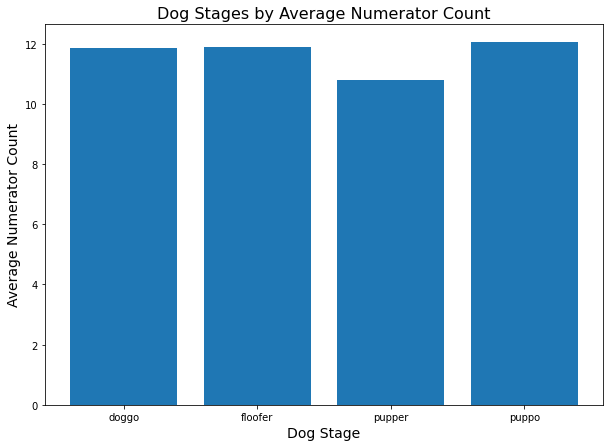

In [294]:
df_favorite = df_master[df_master.dog_stage.isin(['doggo','pupper','floofer','puppo'])]
df_num_favorite = df_favorite.groupby('dog_stage',as_index = False)['rating_numerator'].mean()
Average_numerator_count = df_num_favorite['rating_numerator']
Dog_stage = df_num_favorite['dog_stage']
plt.rcParams["figure.figsize"] = [10, 7]
plt.bar(Dog_stage,Average_numerator_count)

plt.ylabel('Average Numerator Count', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.xlabel("Dog Stage",fontsize = 14)
plt.title('Dog Stages by Average Numerator Count', fontsize = 16)

plt.show();

Based on the analysis above the average rating numerator for puppos was 12.1 which was higher than any other dog stage, this indicates that they are the so called "Good Dogs".

2) Does any dog stage get higher favorite count than the other dog stages. Identify top 3 dog stages based on favorite count. 

In [297]:
df_favorite = df_master[df_master.dog_stage.isin(['doggo','pupper','floofer','puppo'])]
df_favorite = df_favorite.groupby('dog_stage',as_index = False)['favorite_count'].mean()
Dog_Stage = df_favorite['dog_stage']
Average_favorite = df_favorite['favorite_count']
# df_favorite


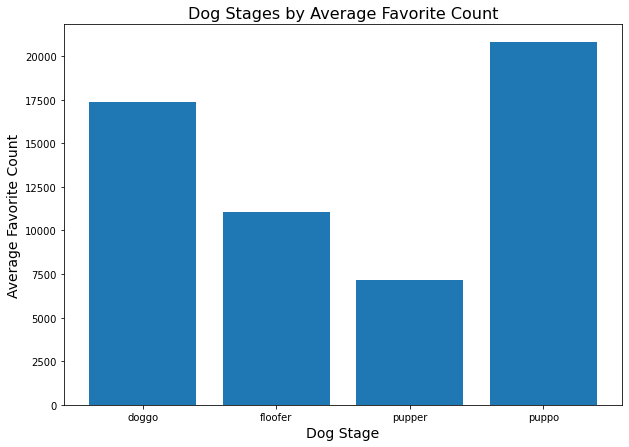

In [299]:
plt.rcParams["figure.figsize"] = [10, 7]
plt.bar( Dog_Stage,Average_favorite)

plt.ylabel('Average Favorite Count', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.xlabel("Dog Stage",fontsize = 14)
plt.title('Dog Stages by Average Favorite Count', fontsize = 16)

plt.show();

Based on the analysis above puppo has the highest average favorite count followed by floofer and doggo.

3) Identifying Top 10 dog breeds based on favorite count and retweet count using p1_breed

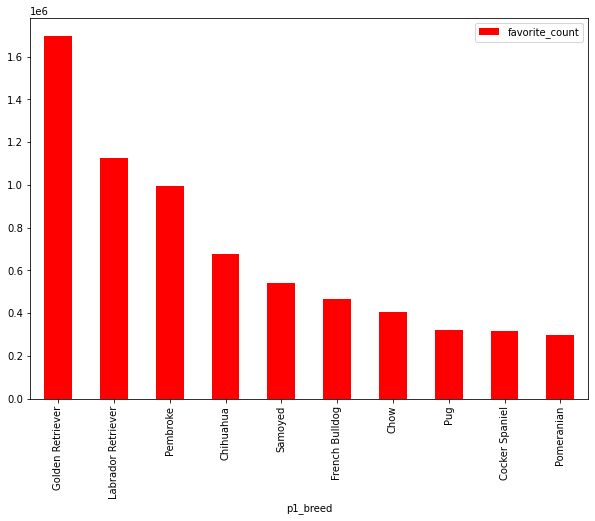

In [300]:
df_top_10 = df_master.groupby(df_master['p1_breed'] ).agg({'favorite_count': 'sum'}).sort_values(by = 'favorite_count',ascending = False).head(10).plot(kind = 'bar',color = 'Red');

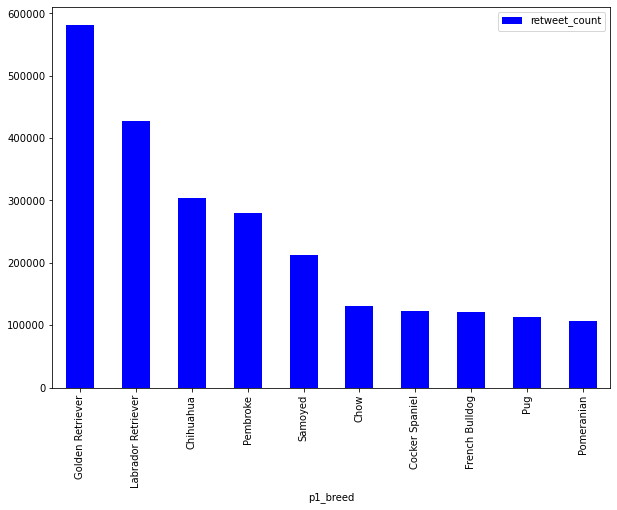

In [301]:
df_retweet = df_master.groupby(df_master['p1_breed'] ).agg({'retweet_count': 'sum'})
df_retweet.sort_values(by = 'retweet_count',ascending = False).head(10).plot(kind = 'bar',color = 'Blue');

5) Are retweets and favorites correlated?

In [302]:
corr = df_master[['rating_numerator','retweet_count','favorite_count']].corr()
corr

,rating_numerator,retweet_count,favorite_count
rating_numerator,1.000000,0.007023,0.003462
retweet_count,0.007023,1.000000,0.702881
favorite_count,0.003462,0.702881,1.000000


### Insights:
1. Puppo is the favorite dog stage based on the ratings and favorite count.

2. Golden retreiever is the favorite dog breed, followed by labrador retriever based favorite and retweet count.

3. Favorite Count and Retweet Count show high correlation as one would expect, so for the dog with high favorite count, the retweet count is also high.

### Visualization

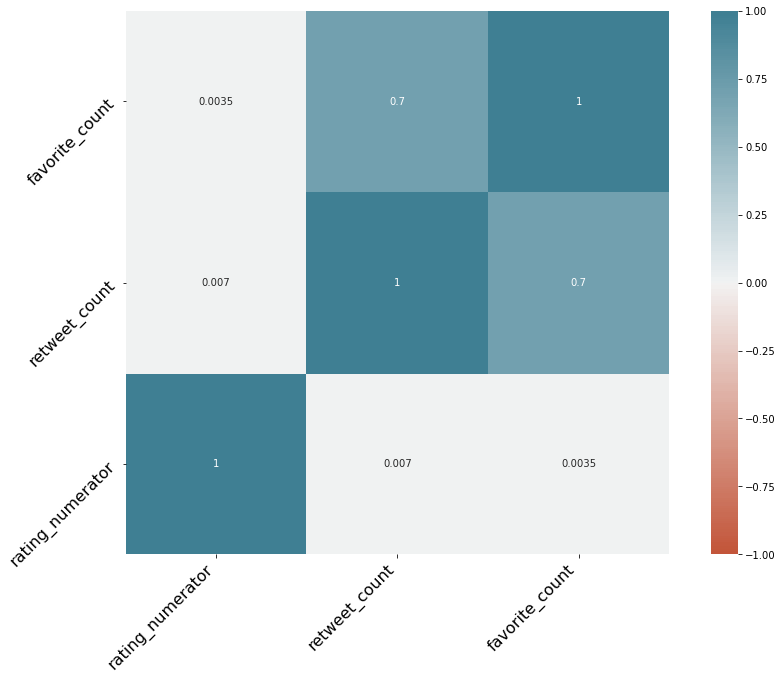

In [303]:
fig, ax = plt.subplots(figsize=(15,10))
# sns.set(font_scale=1.6)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize = 16
)
ax.invert_yaxis()

ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 16,rotation = 45);

Per the heat map above the favorite count and the retweet count show strong correlation but the ratings do not show high correlation to either favorite count or retweet count